In [3]:
##Import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
pd.set_option("display.max_rows", 500)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.compose import make_column_transformer


import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats
from scipy.stats import norm, kurtosis, skew

# Import specific libraries
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('expand_frame_repr', False)



In [4]:
#Loading updated dataset

%store -r all_data
%store -r y_train

In [5]:
##Se crea un feature con todos los ordinales, los cuales son relativos a la calidad de la infraestructura
all_data["TotalPoints"] = (all_data.ExterQual + all_data.FireplaceQu + all_data.GarageQual + all_data.KitchenQual +
                            all_data.BsmtQual + all_data.BsmtExposure + all_data.BsmtFinType1 + all_data.PoolQC + 
                            all_data.ExterCond + all_data.BsmtCond + all_data.GarageCond + all_data.OverallCond +
                            all_data.BsmtFinType2 + all_data.HeatingQC) + all_data.OverallQual**2

##Se crea un feature que agrega los puntajes de todos los extras dentro la infarestructura
all_data["TotalExtraPoints"] = all_data.HeatingQC + all_data.PoolQC + all_data.FireplaceQu  + all_data.KitchenQual

In [20]:
def plot_vars(cols, t, target):
    sns.reset_defaults()
    sns.set(style="ticks", color_codes=True)
    fig = plt.figure(figsize = (10,20))
    i = 1
    for col in cols:
        fig_i= fig.add_subplot(9,2,i)
        sns.regplot( x= col, y = target, data = t )
        plt.title("Correlation to target:{:1.4f}".format(t[col].corr(t[target])))
        i +=1
        plt.show()

In [21]:
##Creamos dataset para analizar qué tan buenos son estos dos features
df = all_data.iloc[:len(y_train), :]
df["SalePrice"] = y_train

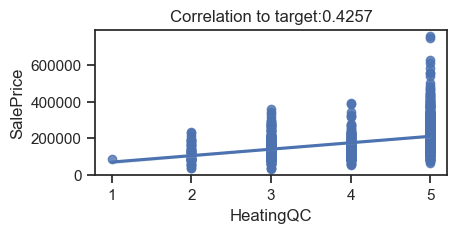

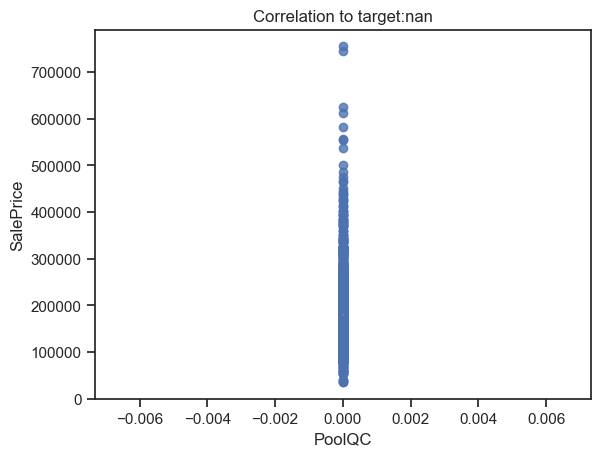

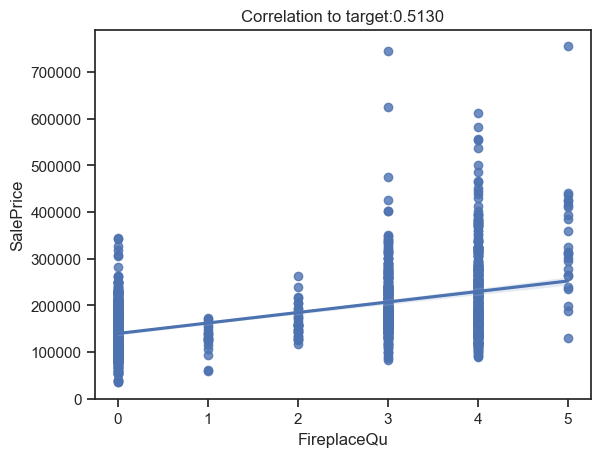

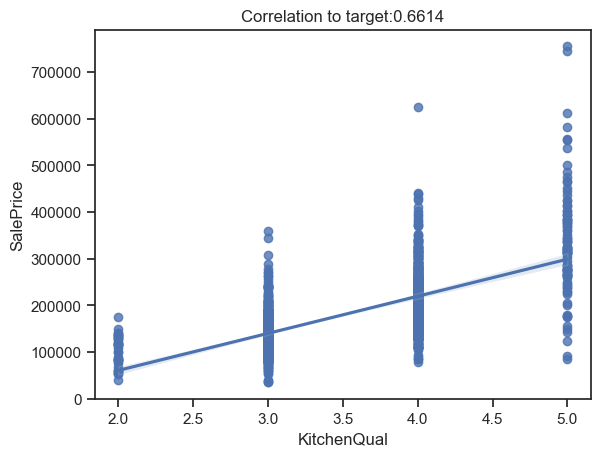

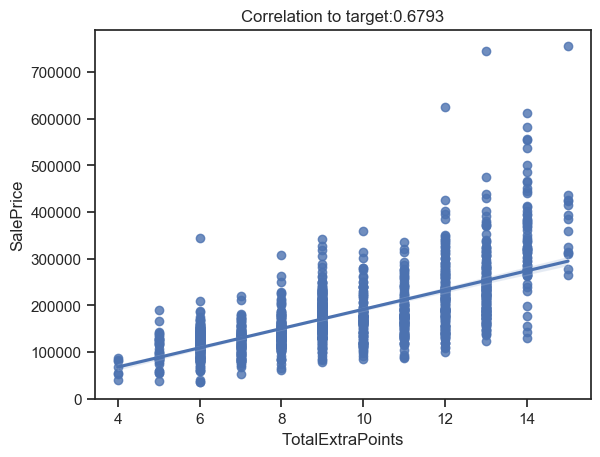

In [22]:
##Analisis gráfico y de correlación...
col_extra = ["HeatingQC",  "PoolQC",  "FireplaceQu",   "KitchenQual", "TotalExtraPoints"]
plot_vars(col_extra, df, "SalePrice")

##Se ve que extrapoints aporta una mayor correlación que todos los feats individuales

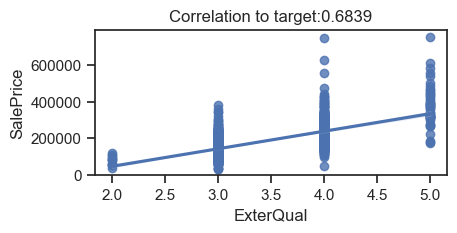

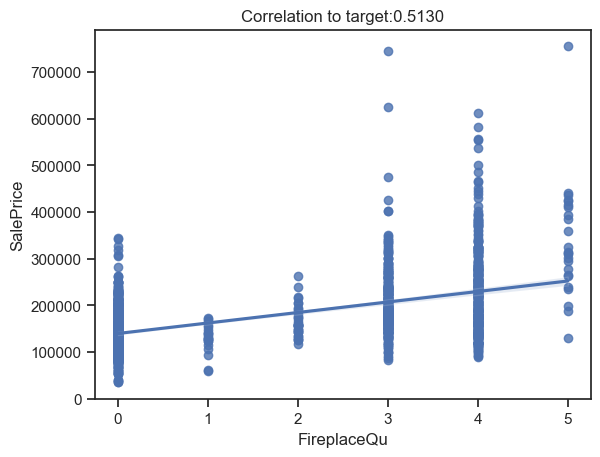

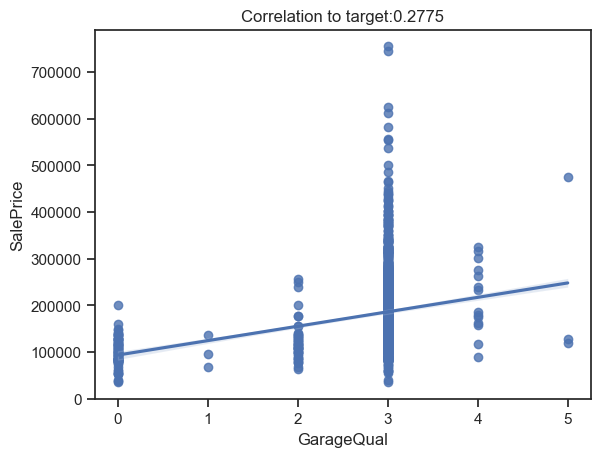

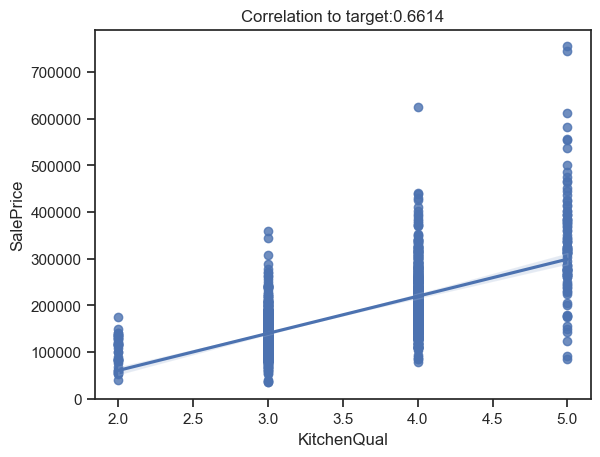

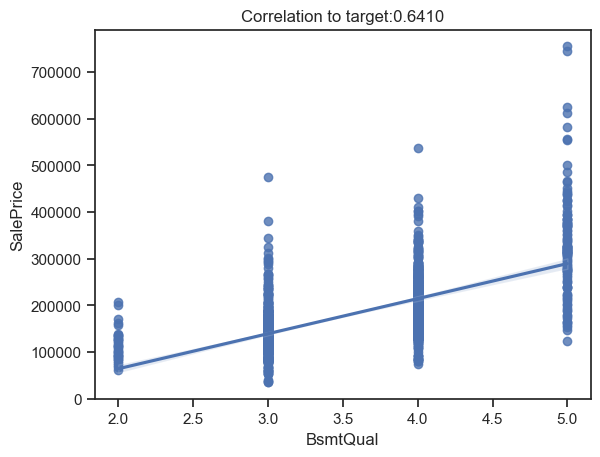

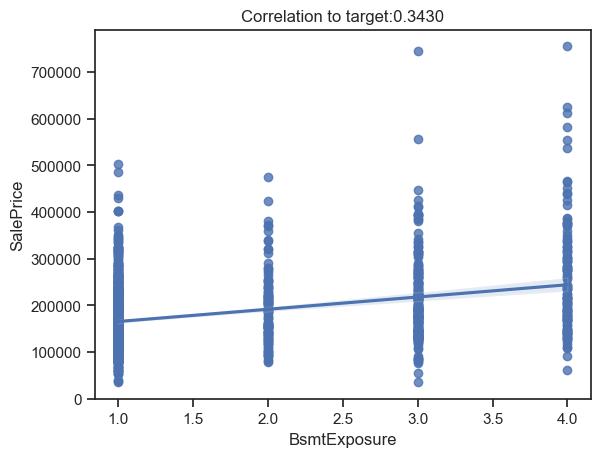

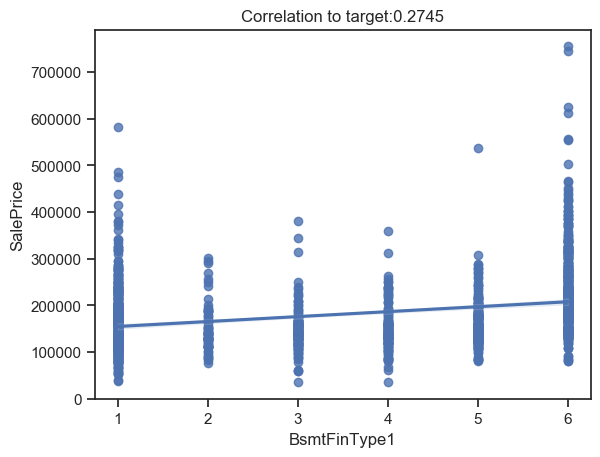

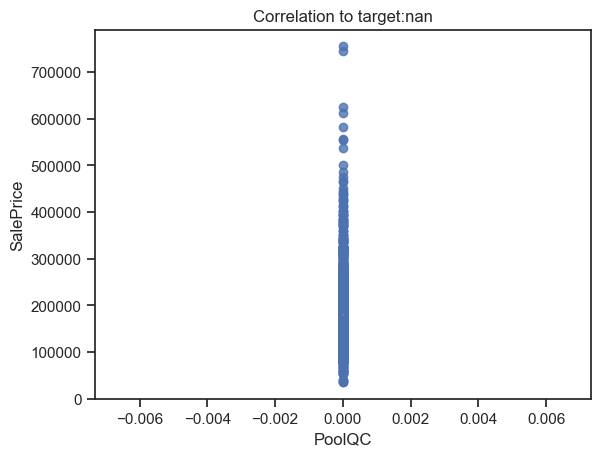

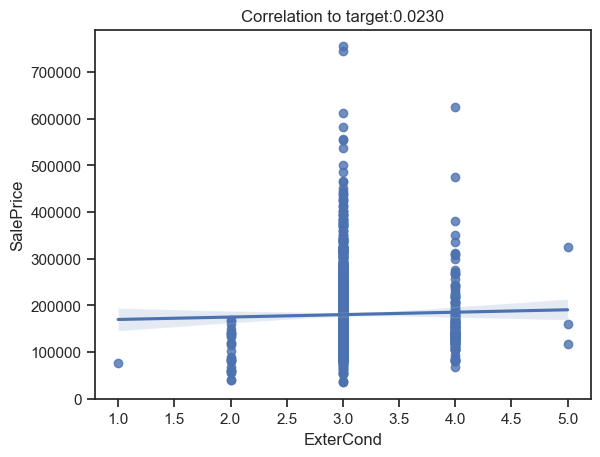

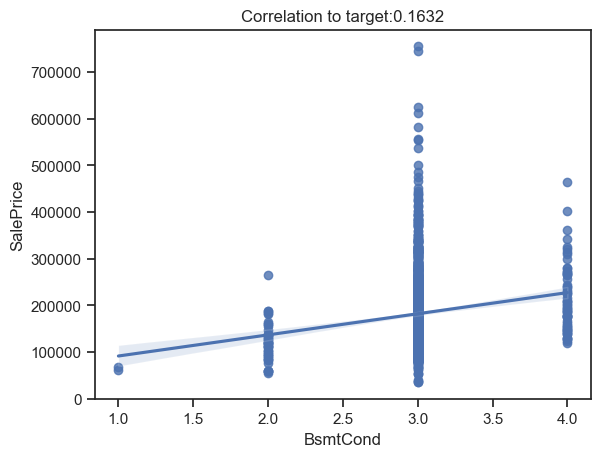

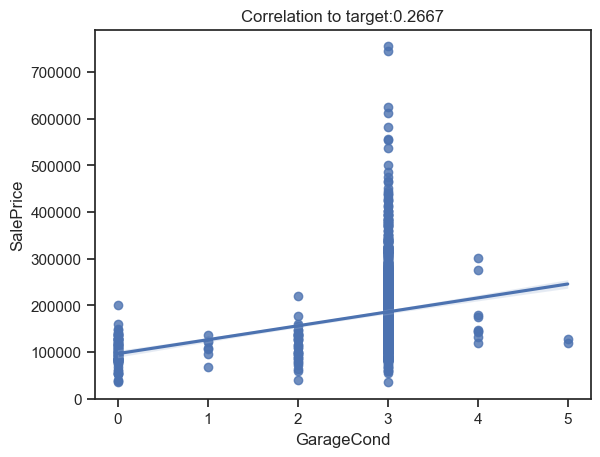

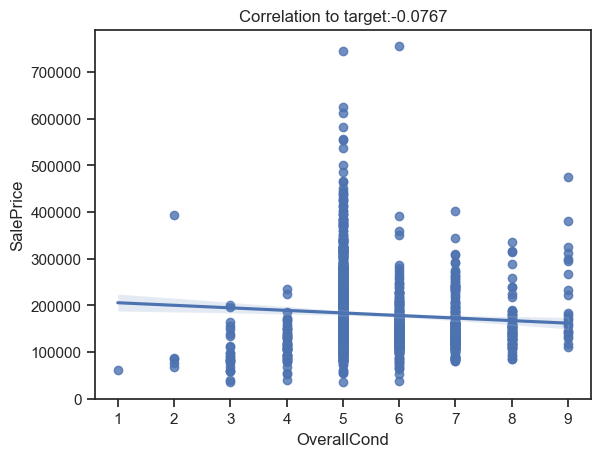

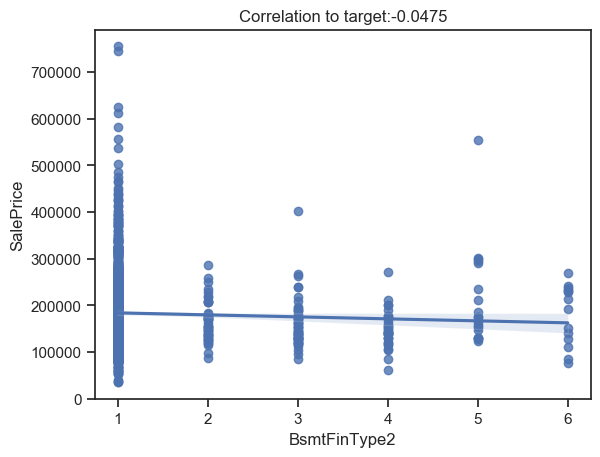

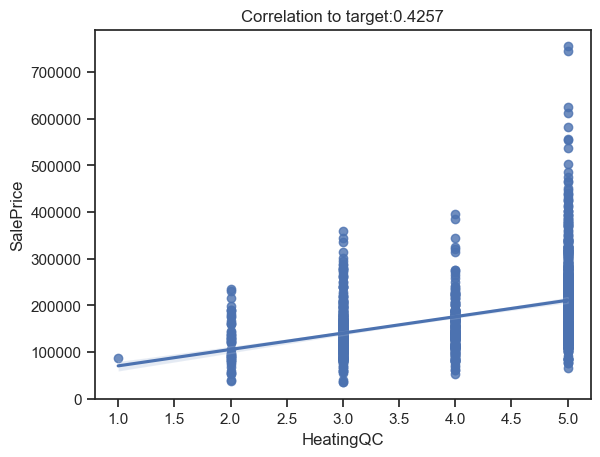

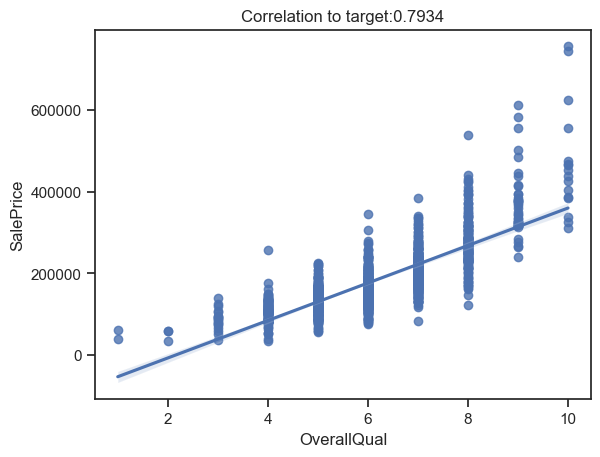

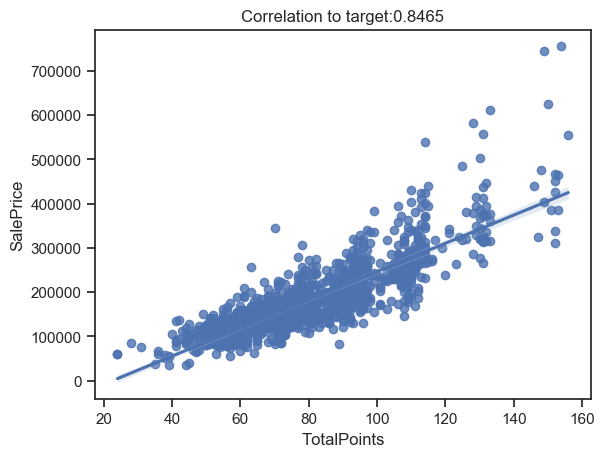

In [23]:
col_total = ["ExterQual" , "FireplaceQu" , "GarageQual" , "KitchenQual" ,
                            "BsmtQual" , "BsmtExposure" , "BsmtFinType1" , "PoolQC" , 
                            "ExterCond" , "BsmtCond" , "GarageCond" , "OverallCond" ,
                            "BsmtFinType2" , "HeatingQC" , "OverallQual", "TotalPoints"]
plot_vars(col_total, df, "SalePrice")

In [ ]:
#Total points arroja una bella distribución con una correlación de .84 baja varianza